## About dataset:
This is iris dataset. It contains numeric attributes of flowers, namely, setosa, versicolor and virginica. We have to classify these flowers based on their attributes. 

## Problem Statement:
Classify flower species based on its attributes

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploring data

In [3]:
df.shape

(150, 5)

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
# Finding missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Data Preprocessing

In [8]:
# Changing categorical column into numerical
df['species'] = df['species'].replace({'setosa':0,'versicolor':1,'virginica':2})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data Vizualization

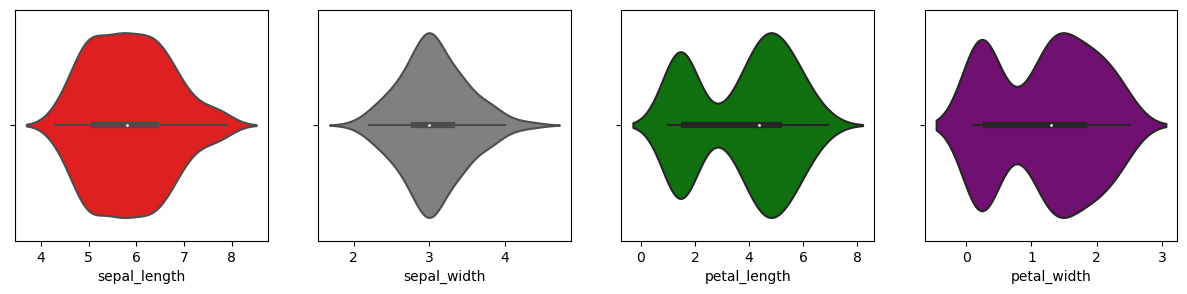

In [9]:
col_list = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
colors = ['red', 'gray', 'green', 'purple']
plt.figure(figsize=(15,3))
for i in range (4):
    plt.subplot(1,4,i+1)
    sns.violinplot(df[col_list[i]], color=colors[i])
plt.show()

* The sepal_length values are in range of 5 to 7.
* The sepal_width values are largely concentrated around 3.
* The petal_length values are concentrated in between 1 to 2 and 4 to 6.
* The petal_width values are concentrated in between 0 to 0.5 and 1 to 2.5.

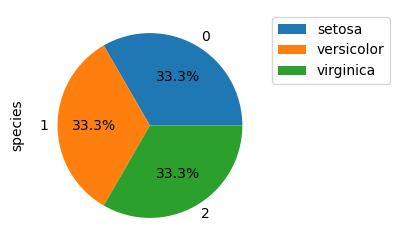

In [10]:
plt.figure(figsize=(3,3))
df['species'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.legend(['setosa','versicolor','virginica'], bbox_to_anchor = (1,1))
plt.show()

The data contains equal number of points of every flower species. 

<AxesSubplot:>

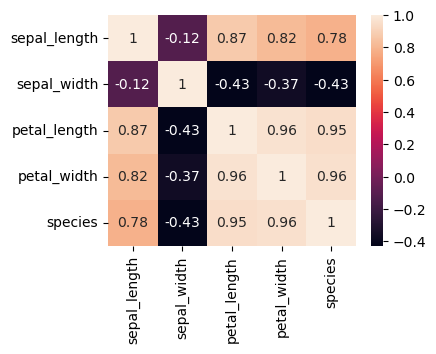

In [11]:
plt.figure(figsize=(4,3))
sns.heatmap(df.corr(), annot=True)

It seems the target column 'species' is strongly related to 'petal_width' and 'petal_length'.

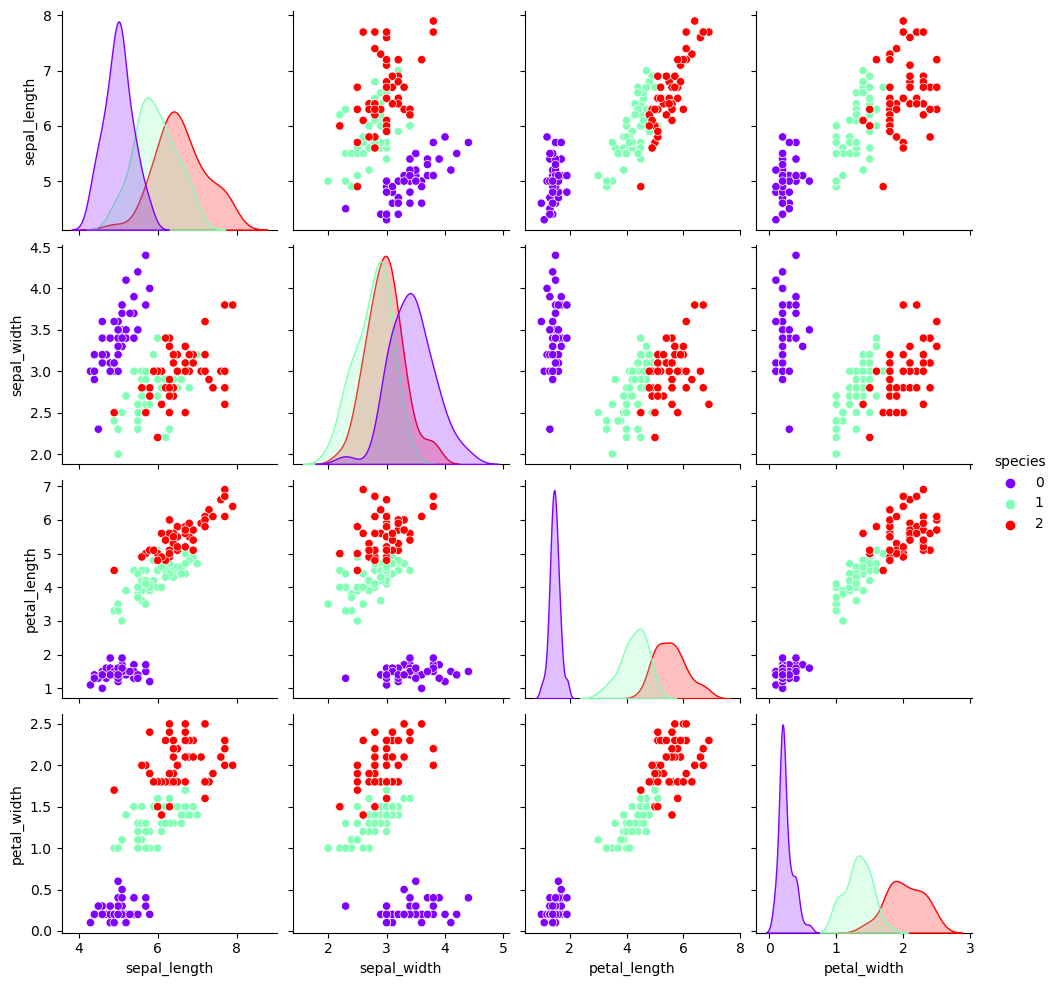

In [12]:
sns.pairplot(df, hue='species', palette = 'rainbow')

Above pairplot gives bivariate analysis. Petal length and petal width have linear relation.

## Building Model: k-Nearest Neighbor

In [13]:
# Define x & y
x = df.drop("species", axis =1)
y = df["species"]

In [14]:
# Train-test-split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.25, random_state = 42)

In [15]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = pd.DataFrame(ss.fit_transform(x_train))
x_test = pd.DataFrame(ss.transform(x_test))

In [16]:
# Hyperparameter tuning using GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 

parameters = {'n_neighbors':np.arange(1, 20, 2)}

from sklearn.model_selection import GridSearchCV
gd= GridSearchCV(knn, parameters, cv=5, n_jobs = -1, verbose = 1)
gd.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
             verbose=1)

In [17]:
# Best parameters
print("Best Score: ", gd.best_score_) 
print("Best Parameters: ", gd.best_params_)

Best Score:  0.9371541501976285
Best Parameters:  {'n_neighbors': 3}


In [18]:
# Evaluating model for best parameters
knn_best = KNeighborsClassifier(n_neighbors=3)
knn_best.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
# Prediction
ypred = knn_best.predict(x_test)

In [20]:
# Evaluating model using sklearn metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy: ', accuracy_score(y_test, ypred))
print('-----------------------------------------------')
print('Confusion matrix: \n', confusion_matrix(y_test, ypred))
print('-----------------------------------------------')
print('Classification report: \n', classification_report(y_test, ypred))

Accuracy:  1.0
-----------------------------------------------
Confusion matrix: 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
-----------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



#### The accuracy of this model is 100% !!